<h1 align="center">Machine Learning for Bioinformatics</h1>
<h3 align="center">Freie Universität Berlin - SoS 2024</h3>
<h5 align="center">Exercise Notebook Week 8 - Artificial Neural Networks</h5>
<hr style="border:2px solid gray">

### Import python packages
---

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Import torchvision (optional)
import torchvision.transforms as transforms
from torchvision import datasets

---
# Assignment 1: Introduction to PyTorch (optional)
---

Install Torch for Python. Instructions are available [here](https://pytorch.org/get-started/locally/).

---
## 1.1 Tensors
---
Tensors are a special data structures implemented in the torch library. They are very similar to Numpy ndarrays and have most of their functionalities. However, they can be pushed to GPUs where fast linear algebra operations are available. In addition, torch tensors implement automatic differentiation, a computational method to compute derivatives of arbitrary differentiable functions. This is crucial for training complex neural networks or estimating the parameters of statistical models. With torch (and tensorflow), we can easily define functions that we want to optimize and use gradient descent methods to compute optimizers without the need to explicitly derive the gradients. However, in order for this to work, we must rely solely on functions and data structures provided by torch.


In [3]:
# Convert your data in list of lists format into tensor:
data = [[1, 2],[3, 4]]
t_data = torch.tensor(data)
print(f"Tensor from list:\n{t_data}")

Tensor from list:
tensor([[1, 2],
        [3, 4]])


In [4]:
# Convert your data in list of lists format into tensor of specific type:
f_tensor = torch.FloatTensor([[1,2], [3,4]])
print(f"Tensor of floats from list:\n{f_tensor}")

Tensor of floats from list:
tensor([[1., 2.],
        [3., 4.]])


In [5]:
# Convert a numpy array into tensor:
np_array = np.array(data)
t_np = torch.from_numpy(np_array)
print(f"Tensor from numpy array:\n{t_np}")

Tensor from numpy array:
tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [6]:
# Create tensor from another existing one
t_ones = torch.zeros_like(t_data) 
print(f"Ones Tensor:\n{t_ones}")

Ones Tensor:
tensor([[0, 0],
        [0, 0]])


In [7]:
# Create tensor of same shape as existing one, fill with random values of specified datatype
t_rand = torch.rand_like(t_data, dtype=torch.float) 
print(f"Random Tensor:\n{t_rand}")

Random Tensor:
tensor([[0.1691, 0.1949],
        [0.4695, 0.7523]])


In [8]:
# Create tensor for some shape and fill it with random values
shape = (2,3,)
rand_tensor = torch.rand(shape)
print(f"Random Tensor:\n{rand_tensor}")

Random Tensor:
tensor([[0.3039, 0.6293, 0.9091],
        [0.1756, 0.8937, 0.2603]])


In [9]:
# Go back to numpy array
rand_array = rand_tensor.numpy()
print(f"numpy array from tensor:\n{rand_array}")

numpy array from tensor:
[[0.30393714 0.6293079  0.90911245]
 [0.17562073 0.89372635 0.26026154]]


In [10]:
# Some of the attributes of a tensor
print(rand_tensor.shape)
print(rand_tensor.dtype)
print(rand_tensor.device)

torch.Size([2, 3])
torch.float32
cpu


In [11]:
# Numpy-tensor conversion
n = np.zeros(5)
t = torch.from_numpy(n)
print(f"t: {t}")
np.add(n, 1, out=n) # change the numpy array and look what happens with tensor
print(f"new t: {t}")
print(f"new n: {n}")

t: tensor([0., 0., 0., 0., 0.], dtype=torch.float64)
new t: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
new n: [1. 1. 1. 1. 1.]


---
## 1.2 Loading data
---
PyTorch and related packages come with a great number of datasets or simple wrappers to quickly access well known benchmark sets. You can access them by using domain specific packages - in our case from `torchvision`.

The `Dataset` from `torch.utils.data` stores the samples and their corresponding labels. You can transform your data to tensors in this step and also normalize, augument or manipulate your imagea in some way. `ToTensor` converts a PIL image or NumPy ndarray into a FloatTensor, scales the image pixel intensity values to a range of $[0, 1]$.

We will be downloading the infamous MNIST dataset. It is a collection of handwritten digits, that were size-normalized and centered in 28 x 28 pixels image. The Training and test sets contain 60000 and 10000 images respectively.

The `DataLoader` from `torch.utils.data` wraps an iterable around your `Dataset` for an easy access. `DataLoader` provides a convinient way of representing a data with its' corresponding label. Typically, we train our model in batches and also shuffle samples in each epoch to reduce overfitting, this is implemented in a user-friendly API.

In [12]:
training_data = datasets.MNIST(      # specify the name of the dataset
    root="data",                     # path where the train/test data is stored,
    train=True,                      # specifies training or test dataset
    download=True,                   # downloads the data if it is not available at root
    transform=transforms.ToTensor()  # transform and target_transform specify the feature and label transformations
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

print(f" Shape of training data {training_data.data.shape}")
print(f" Shape of test data {test_data.data.shape}")

batch_size   = 64
train_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(    test_data, batch_size=batch_size, shuffle=True)

 Shape of training data torch.Size([60000, 28, 28])
 Shape of test data torch.Size([10000, 28, 28])


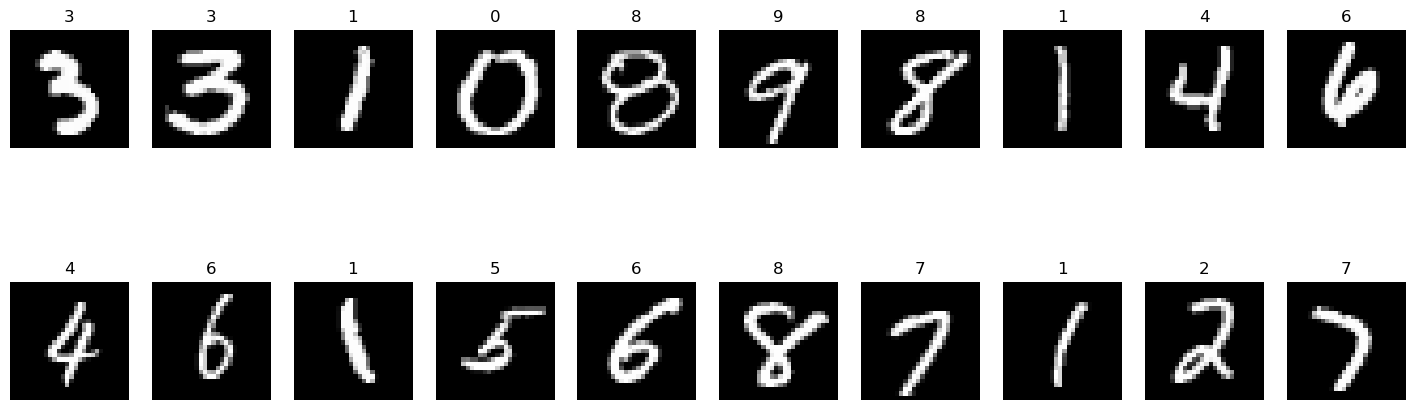

In [13]:
# let's have a look at some of the images

import matplotlib.pyplot as plt

figure = plt.figure(figsize=(18, 6))
cols, rows = 10, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


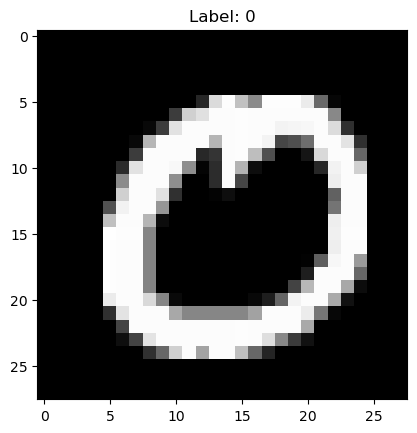

In [14]:
# Display image and label of first sample in first batch
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.title(f"Label: {label}")
plt.show()

--- 
## 1.3 Automatic differentiation for computing optimizers
---

As mentioned, Torch implements automatic differentiation, which makes allows us to easily obtain gradients for arbitrary differentiable functions. We test this feature on the well known Rosenbrock function
$$
    f(x_1, x_2) = (a - x_1)^2 + b(x_2 - x_1^2)^2
$$

In [15]:
def f(x1, x2, a = 1, b = 100):
    return (a - x1)**2 + b * (x2 - x1**2)**2

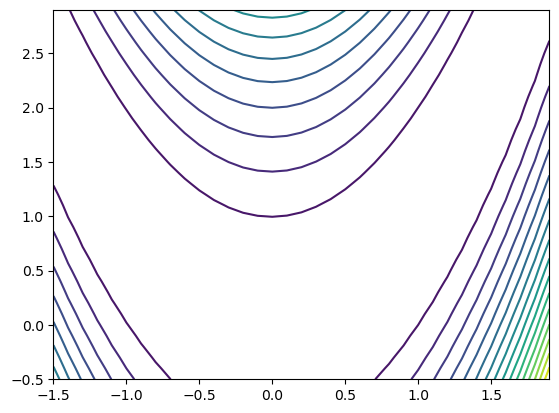

In [16]:
def plot_rosenbrock(path=None):
    x1_min = -1.5
    x1_max =  2.0
    x2_min = -0.5
    x2_max =  3.0

    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
    y = f(x1, x2)
    plt.contour(x1, x2, y, extent=[x1_min, x1_max, x2_min, x2_max], origin='lower', levels=20)
    if path is not None:
        plt.plot(path[:,0], path[:,1], linestyle='--', marker='o')
    plt.show()

plot_rosenbrock()

Let's differentiate the function at $(x_1, x_2) = (0, 2)$:

In [17]:
# Define input variables. Make sure to use `requires_grad=True` to enable automatic differentiation
x1 = torch.tensor(0, requires_grad=True, dtype=torch.float32)
x2 = torch.tensor(2, requires_grad=True, dtype=torch.float32)
# Call our rosenbrock function
y = f(x1, x2)
# The following command propagates the gradient (partial derivatives) back to the input variables
y.backward()

We can print the gradient $\nabla f(x_1, x_2) = (\partial_{x_1}, \partial_{x_2})^\top f(x_1, x_2)$ as follows:

In [18]:
print(f'gradient: ({x1.grad}, {x2.grad})')

gradient: (-2.0, 400.0)


It is important to note that automatic differentation does not compute a symbolic form of the partial derivatives! Instead, it computes for each input values the numeric value of the partial derivatives.

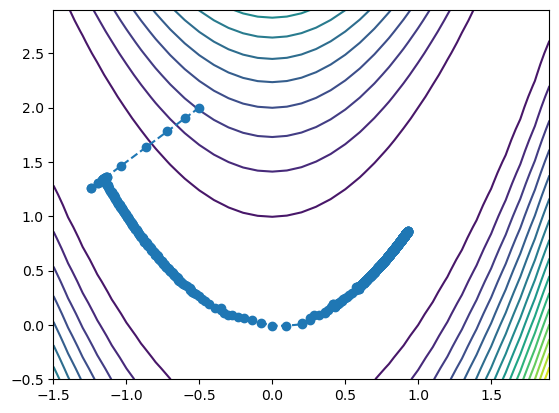

In [19]:
x1 = torch.tensor(-0.5, requires_grad=True, dtype=torch.float32)
x2 = torch.tensor( 2.0, requires_grad=True, dtype=torch.float32)

# We hand our variable to the Rprop optimizer, i.e. a gradient descent method
opt  = torch.optim.Rprop([x1, x2], lr=0.1)
# The optimizer will modify our variables, but we keep a copy of the values at each step
path = [[x1.item(), x2.item()]]
# The following loop performs several gradient descent steps
for i in range(1000):
    # Reset all gradient information
    opt.zero_grad()
    # Call our objective function
    y = f(x1, x2)
    # Compute gradients
    y.backward()
    # Perform one gradient step
    opt.step()
    # Record new values
    path.append([x1.item(), x2.item()])

# Plot resulting path
plot_rosenbrock(path=np.array(path))

---
#  Assignment 2: Numeric version of polynomial regression
---
In this assignment we implement the same polynomial regression model as we used in a previous exercise. However, instead of relying on the analytical solution for estimating the parameters, we use pytorch to compute numerical solutions.

In [20]:
# From our previous exercise...
data = np.array([
    0.001399613, -0.23436656,
    0.971629779,  0.64689524,
    0.579119475, -0.92635765,
    0.335693937,  0.13000706,
    0.736736086, -0.89294863,
    0.492572335,  0.33854780,
    0.737133774, -1.24171910,
    0.563693769, -0.22523318,
    0.877603280, -0.12962722,
    0.141426545,  0.37632006,
    0.307203910,  0.30299077,
    0.024509308, -0.21162739,
    0.843665029, -0.76468719,
    0.771206067, -0.90455412,
    0.149670258,  0.77097952,
    0.359605608,  0.56466366,
    0.049612895,  0.18897607,
    0.409898906,  0.32531750,
    0.935457898, -0.78703491,
    0.149476207,  0.80585375,
    0.234315216,  0.62944986,
    0.455297119,  0.02353327,
    0.102696671,  0.27621694,
    0.715372314, -1.20379729,
    0.681745393, -0.83059624 ]).reshape(25,2)
y = data[:,1]
X = data[:,0:1]

def compute_polynomial_features(X, degree):
    # degree = p+1
    x = X if len(X.shape) == 1 else X[:,0]
    F = np.array([]).reshape(x.shape[0], 0)
    for deg in range(degree+1):
        F = np.insert(F, deg, x**deg, axis=1)
    return F

You can implement a class that will hold your own data. Let's use the data from our polynomial regression exercise. We implement a class that inherits from the `Dataset` class. You must implement the `__init__`, `__len__` and `__getitem__` functions. After that you can load the data into with the `DataLoader` just like before.

In [21]:
class PolynomialFeatures(Dataset):
    def __init__(self, X, y, degree=3):
        self.X = compute_polynomial_features(X, degree).astype('float32')
        self.y = y.astype('float32').reshape(-1,1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

In [22]:
# Create a dataset with polynomial features
training_data = PolynomialFeatures(X, y, degree=3)

---
## 2.1 Build our first model
---
Create a class that inherits from torch's parental nn.Module. In the `__init__` method specify the layers and activation functions or even the whole sequence of layers and activations you want to implement in your neural network. In the `forward` method push your data through the network you've just described. 

In [23]:
class PolynomialNetwork(torch.nn.Module):
    def __init__(self, degree):
        super(PolynomialNetwork, self).__init__()
        # The Linear class defines a weight matrix W of dimension (p, m), where p
        # is the dimension of the input (p features) and m the dimension of the
        # output (in our case we have m=1 since the response y has only one
        # dimension). We do not use an explicit bias, because we have encoded the
        # bias in our feature vectors!
        # Complete the implementation using `torch.nn.Linear`
        p = degree+1 #number of features
        m = 1
        self.linear_layer = torch.nn.Linear(p, m)
        #input = torch.randn(128, 20)
        #output = m(input)
        #print(output.size())
        

    def forward(self, x):
        # Calling the linear layer computes the matrix product of x with the
        # weight matrix W
        return self.linear_layer(x)

In [24]:
model = PolynomialNetwork(degree = 3)
print(model)

PolynomialNetwork(
  (linear_layer): Linear(in_features=4, out_features=1, bias=True)
)


---
## 2.2 Training 
---
Training a model always follows the same pattern. Within each iteration, we must feed the data through our model, compute the gradient and update our parameters. In particular, we create a function that iterates over the data, each iteration is called an epoch. Within each epoch, we receive our data in batches. In our case there is only one batch. For each batch there will be a loop where we:

1) Call `model.train()`. It doesn't train the model, but lets torch know that we are in a trainig loop. This is important for some functions that behave differently on train/test sets. In our case, it is optional. 

2) Call our model on the data, which creates an initial prediction by running the forward function.

3) Calculate the loss by calling our predefined loss function.

4) Set our gradient to zero `zero_grad()`. This is an important step, because otherwise the gradients from prevoious batch/epoch will accumulate. 

5) Calculate the gradients for parameters with `backward()` call.

6) Update model weights based on the computed gradients - `step()` call.

In [25]:
def train(dataloader, model, loss_fn, optimizer, epochs ):
    losses = []

    for _ in range(epochs):
        for X, y in dataloader:
            # Complete the implementation.
            model.train()
            outputs = model(X)
            loss = loss_fn(outputs, y)

            # Record loss
            losses.append(loss.item())
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return losses

We initialize a new network object and train the parameters:

In [26]:
# Create a new polynomial model
model = PolynomialNetwork(degree = 3)
# Use the mean squared error (MSE) as loss function
loss_fn = torch.nn.MSELoss()
# We use Rprop as an optimizer, which is a non-stochastic optimizer with an adaptive step size for each variable
optimizer = torch.optim.Rprop(model.parameters(), lr=0.5)
# Since we use a non-stochastic optimizer, we use a batch_size as big as our training data, hence there is only one batch
train_loader = DataLoader(training_data, batch_size = len(training_data))
# train data
epochs = 10000
losses = train(train_loader, model, loss_fn, optimizer, epochs)

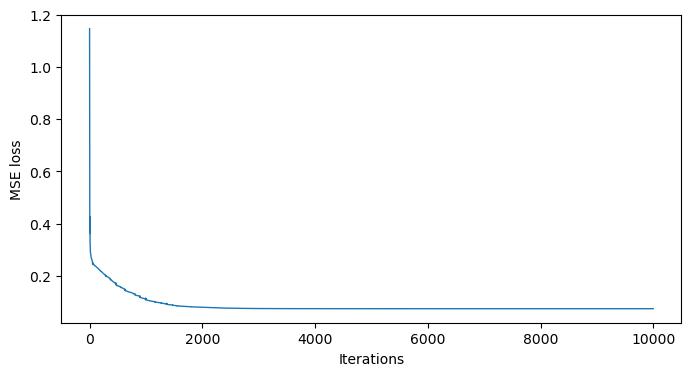

In [27]:
plt.figure(figsize = (8,4))
plt.plot(losses, linewidth = 1)
plt.xlabel('Iterations')
plt.ylabel("MSE loss")
plt.show()

We extract the parameter estimates:

In [28]:
print(f" Model weights {model.linear_layer.weight.detach().numpy()[0]}")

 Model weights [ -0.42729238  10.911506   -32.59398     22.669512  ]


Let's compare the result with the analytical solution, i.e. the *PolynomialRegression* class from our previous exercises.

In [29]:
# From our previous exercise:
class PolynomialRegression:
    def __init__(self, degree=1, alpha=0.0):
        self.degree = degree
        self.theta  = None
        self.alpha  = alpha
    
    def fit(self, X, y):
        F = compute_polynomial_features(X, self.degree)
        self.theta = np.linalg.pinv(F.transpose()@F + self.alpha*np.identity(F.shape[1]))@F.transpose()@y

    def predict(self, X):
        F = compute_polynomial_features(X, self.degree)
        return F@self.theta

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def get_params(self, deep=True):
        return {"degree" : self.degree, "alpha" : self.alpha}

Visual comparison of the numerical and analytical solution:

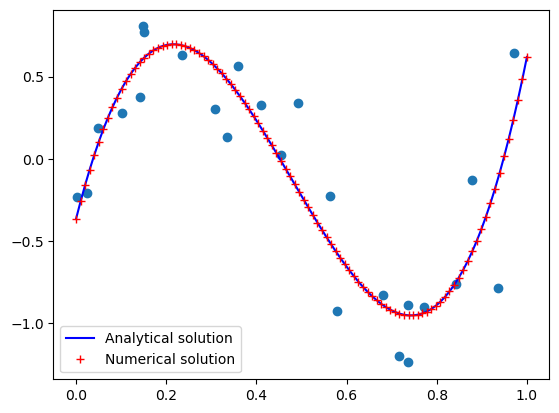

In [30]:
reg = PolynomialRegression(3, alpha=0)
reg.fit(X, y)

x_test = np.linspace(0,1,100)
x_test_tensor = torch.from_numpy(compute_polynomial_features(x_test, 3).astype('float32'))

nn_pred = model.forward(x_test_tensor)
nn_pred = nn_pred.detach().numpy()

plt.plot(x_test, reg.predict(x_test), color = 'blue', label = 'Analytical solution')
plt.plot(x_test, nn_pred, '+', color = 'red', label = 'Numerical solution')
plt.scatter(X[:,0], y)
plt.legend()
plt.show()

---
# Assignment 3: Spam classification
---
Use the SPAM data to classify *spam* and *ham* messages with PyTorch. Split the data into representative training and test data, write a simple neural network and train it with your data


In [31]:
def construct_corpus(data):
    """
    np.array[str, str] -> dict[str:int]
    
    from a 2D array of str, return a hash table
    """
    corpus = set()
    counter = Counter()

    for label, text in data:
        words = text.split()
        corpus.update(words)
        counter.update(words)
    print(f'There are {len(corpus)} unique words')
    print(f'10 most commom words: {counter.most_common(10)}')
    return corpus
        
def recode_messages(data, corpus):
    """
    np.array[str, str] * dict[str:int] -> np.array[int, int]
    
    returns the binary matrix encoding 
    """
    corpus = list(corpus)
    corpus_index = {word: i for i, word in enumerate(corpus)}
    msg_matrix = np.zeros((len(data), len(corpus)), dtype=bool)
    
    for msg_index, (_, message) in enumerate(data):
        for word in message.split():
            msg_matrix[msg_index][corpus_index[word]] = 1
    return msg_matrix

class SpamData(Dataset):
    def __init__(self):
        ## Load the dataset
        sms_data = np.loadtxt('exercise-08-data/SMSSpamCollection_cleaned.csv', delimiter="\t", skiprows=1, dtype=str)
        # Construct a corpus
        self.D = construct_corpus(sms_data)
        # Convert sms data into a binary matrix
        sms_matrix = recode_messages(sms_data, self.D)
        # Convert sms_matrix to a numeric matrix, which can be used as input to our model
        self.X = sms_matrix.astype('float32')
        # Create a vector on numeric labels
        self.y = (sms_data[:,0] == 'spam').astype('float32').reshape(-1,1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    def num_features(self):
        return self.X.shape[1]

spamdata = SpamData()

There are 8753 unique words
10 most commom words: [('i', 3021), ('to', 2253), ('you', 2245), ('a', 1450), ('the', 1339), ('u', 1207), ('and', 980), ('in', 903), ('is', 897), ('me', 807)]


---
## 3.1 Summary statistics 
---

Use `pie` from `matplotlib` to plot the class prevalences of *ham* and *spam* in our `spamdata` object.

[4825  747]


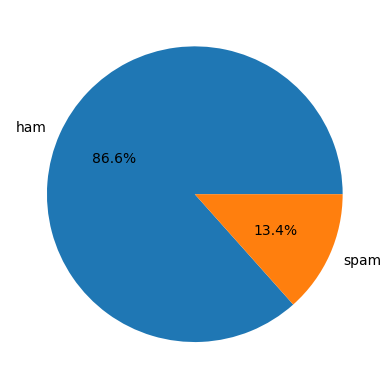

In [32]:
label, counts = np.unique(spamdata.y, return_counts=True)
print(counts)
label_name = np.array(['ham', 'spam'])[label.astype(int)]
plt.pie(counts, labels = label_name, autopct='%1.1f%%')
plt.show()

---
## 3.2 Model definition 
---

Define a simple neural network with one linear layer and a sigmoid activation function. The model should be equivalent to a logistic regression model. Use `torch.nn.Sequential` for the implementation.

In [33]:
class DetectSpamNetwork(torch.nn.Module):
    def __init__(self, size):
        super(DetectSpamNetwork, self).__init__()
        # Complete the implementation
        self.seq = torch.nn.Sequential(
            torch.nn.Linear(size,1),
            torch.nn.Sigmoid())


    def forward(self, x):
        # Complete the implementation
        return self.seq(x)


---
## 3.3 Training 
---

Define a simple `Trainer` class that trains and tests our model for a given loss function and optimizer.

In [34]:
class Trainer:
    def __init__(self, data_train, data_test, model, loss_fn, optimizer):
        self.data_train = data_train
        self.data_test  = data_test
        self.model      = model
        self.loss_fn    = loss_fn
        self.optimizer  = optimizer

    def train_loop(self, dataloader):
        size = len(dataloader.dataset)
        for batch, (X, y) in enumerate(dataloader):
            # Complete the implementation
            self.model.train()
            self.optimizer.zero_grad()
            
            outputs = model(X)
            loss = self.loss_fn(outputs, y)
            
            loss.backward()
            self.optimizer.step()
            
            if batch % 10 == 0:
                loss, current = loss.item(), batch * len(X)
                print(f"loss: {loss:>7f}  [{current:>5d}/{size:>4d}]")

    def test_loop(self, dataloader):
        size = len(dataloader.dataset)
        num_batches = len(dataloader)
        test_loss, correct = 0, 0

        with torch.no_grad():
            for X, y in dataloader:
                self.model.eval()
                pred = self.model(X)
                test_loss += self.loss_fn(pred, y).item()
                correct   += ((pred>0.5) == y).type(torch.float).sum().item()

        test_loss /= num_batches
        correct   /= size
        print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")

    def train(self, epochs, batch_size):
        train_loader = DataLoader(self.data_train, batch_size=batch_size)
        test_loader  = DataLoader(self.data_test , batch_size=batch_size)
        for e in range(epochs):
            print(f"Epoch {e+1}\n-------------------------------")
            self.train_loop(train_loader)
            self.test_loop( test_loader)
        print("Done!")

In [35]:
# Split the data into training and testing
data_train, data_test = torch.utils.data.random_split(spamdata, [len(spamdata)-100, 100], generator=torch.Generator().manual_seed(42))

# Create a new instance of the DetectSpamNetwork model
model = DetectSpamNetwork(spamdata.num_features())
# We use the binary cross-entropy loss (BCELoss), which is identical to the likelihood of a logistic regression model
loss_fn = torch.nn.BCELoss()
# Although we are dealing with a convex optimization problem, we use here a stochastic gradient descent method
optimizer = torch.optim.SGD(model.parameters(), momentum = 0.9, lr=0.01)

# Execute the training of the network
trainer = Trainer(data_train, data_test, model, loss_fn, optimizer)
trainer.train(10, 64)

Epoch 1
-------------------------------
loss: 0.694278  [    0/5472]
loss: 0.592853  [  640/5472]
loss: 0.502111  [ 1280/5472]
loss: 0.446781  [ 1920/5472]
loss: 0.354505  [ 2560/5472]
loss: 0.414209  [ 3200/5472]
loss: 0.307669  [ 3840/5472]
loss: 0.375667  [ 4480/5472]
loss: 0.241238  [ 5120/5472]
Test Error: 
 Accuracy: 88.0%, Avg loss: 0.287231

Epoch 2
-------------------------------
loss: 0.365199  [    0/5472]
loss: 0.272176  [  640/5472]
loss: 0.329105  [ 1280/5472]
loss: 0.286440  [ 1920/5472]
loss: 0.240981  [ 2560/5472]
loss: 0.282597  [ 3200/5472]
loss: 0.197831  [ 3840/5472]
loss: 0.277295  [ 4480/5472]
loss: 0.182601  [ 5120/5472]
Test Error: 
 Accuracy: 92.0%, Avg loss: 0.220256

Epoch 3
-------------------------------
loss: 0.281403  [    0/5472]
loss: 0.207410  [  640/5472]
loss: 0.269278  [ 1280/5472]
loss: 0.212598  [ 1920/5472]
loss: 0.189459  [ 2560/5472]
loss: 0.215944  [ 3200/5472]
loss: 0.146418  [ 3840/5472]
loss: 0.223145  [ 4480/5472]
loss: 0.147127  [ 5120/5

---
## 3.4 Model interpretation 
---

Extract the weights from the trained SpamDetectNetwork and store them in a variable called `weights`. Use `bar` from `matplotlib` to plot the weight corresponding to each word. Sort the words according to their weights.

In [36]:
weightParam = []
for name, param in model.named_parameters():
    weightParam.append(param.detach().numpy())

weights_array = np.array(weightParam[0]).reshape(-1,1)

corpus_D = np.array(list(spamdata.D))
corpus_D = corpus_D.reshape(-1, 1)

weights = np.zeros((len(corpus_D), 2), dtype=object)

for i in range(len(corpus_D)):
    weights[i] = [corpus_D[i][0], weights_array[i]]

#print(weights[8])

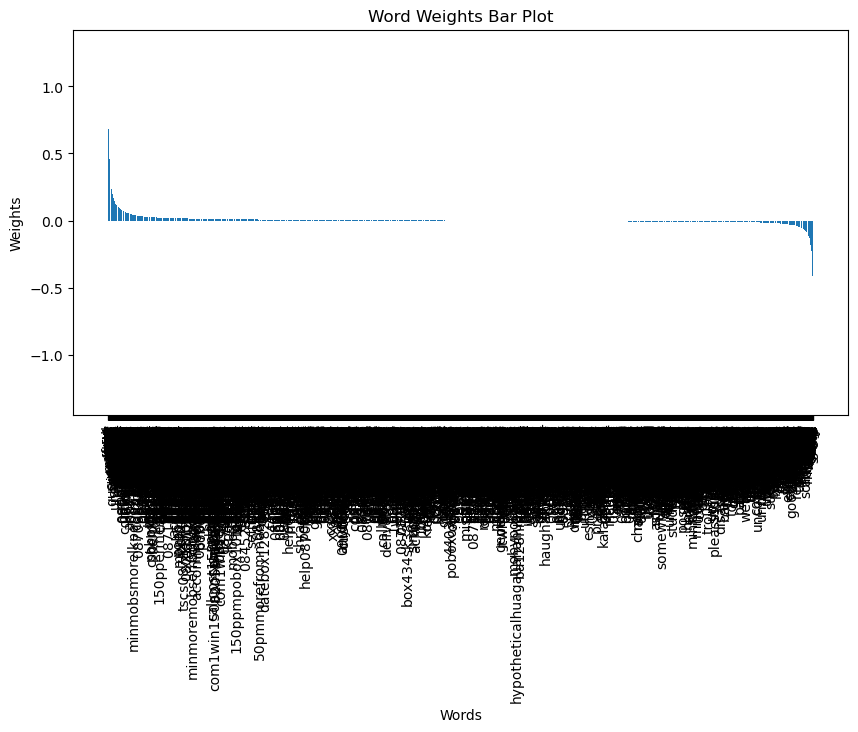

In [37]:
words = weights[:, 0]
word_weights = weights[:, 1].astype(float)

sorted_indices = np.argsort(-word_weights)
sorted_words = words[sorted_indices]
sorted_word_weights = word_weights[sorted_indices]

plt.figure(figsize=(10, 5))
plt.bar(sorted_words, sorted_word_weights)
plt.xlabel('Words')
plt.ylabel('Weights')
plt.title('Word Weights Bar Plot')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

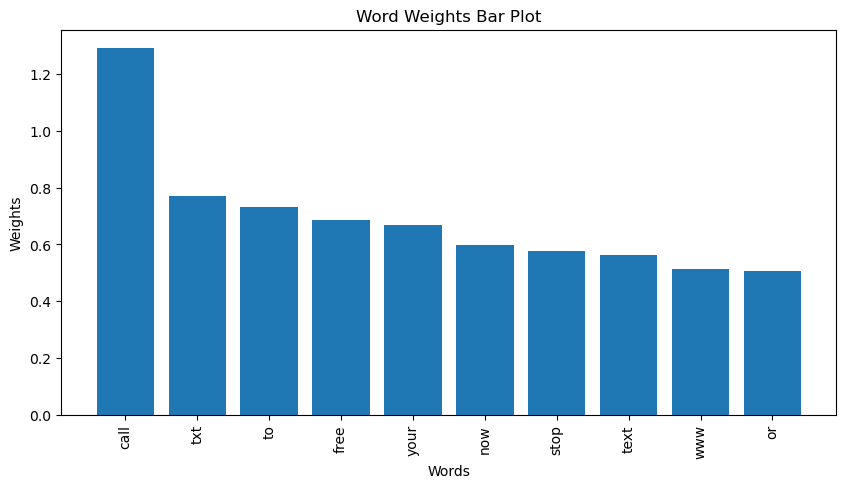

In [38]:
words = weights[:, 0]
word_weights = weights[:, 1].astype(float)

sorted_indices = np.argsort(-word_weights)
sorted_words = words[sorted_indices]
sorted_word_weights = word_weights[sorted_indices]

plt.figure(figsize=(10, 5))
plt.bar(sorted_words[:10], sorted_word_weights[:10])
plt.xlabel('Words')
plt.ylabel('Weights')
plt.title('Word Weights Bar Plot')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

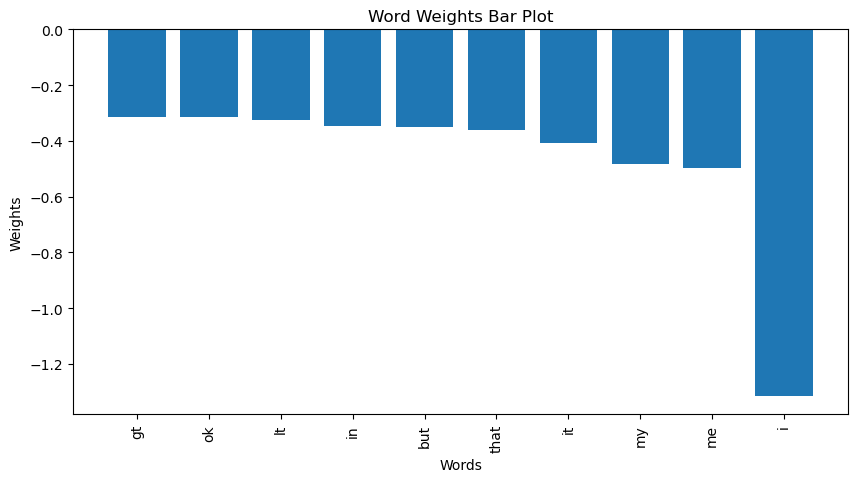

In [39]:
words = weights[:, 0]
word_weights = weights[:, 1].astype(float)

sorted_indices = np.argsort(-word_weights)
sorted_words = words[sorted_indices]
sorted_word_weights = word_weights[sorted_indices]

plt.figure(figsize=(10, 5))
plt.bar(sorted_words[-10:], sorted_word_weights[-10:])
plt.xlabel('Words')
plt.ylabel('Weights')
plt.title('Word Weights Bar Plot')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

---
## 3.5 Model evaluation 
---

Use `confusion_matrix` to plot a confusion matrix. Compute the predictions on the `test_data` and use a threshold of $0.5$ to convert class probabilities to labels.

In [40]:
test_loader = DataLoader(data_test, batch_size=len(data_test))

model.eval()
pred = []
act = []
with torch.no_grad():
    for X, y in test_loader:
        outputs = model(X)
        preds = (outputs > 0.5).float().numpy().flatten()
        pred.extend(preds)
        act.extend(y.numpy().flatten())

pred = np.array(pred)
act = np.array(act)


In [41]:
confusion_matirx = confusion_matrix(act, pred)

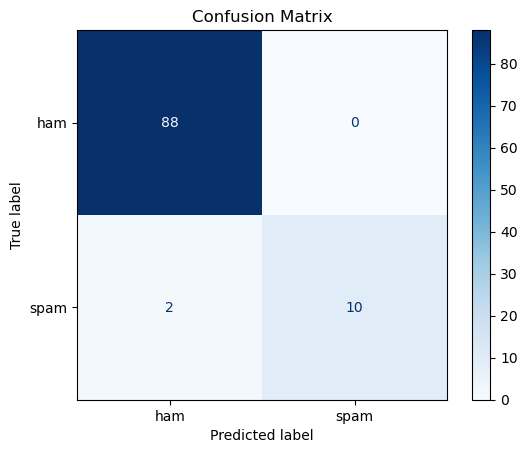

In [42]:
# Plot the confusion matrix using sklearn's ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matirx, display_labels=['ham', 'spam'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
